In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats 
from sklearn.metrics import mean_squared_error

# for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import and explore data

In [2]:
#read the file
df = pd.read_csv('..\Cars datasets\Toyota Corolla.csv')

df.shape
df.info()
df.describe()
df.head(5)

(1436, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


1. We have 1436 data rows.
2. 10 feature variables. 1 categorical , 9 interval
3. No missing values


* Price - Offer Price in EUROs 
* Age - age in years
* KM - Accumulated Kilometers on odometer
* FuelType - Fuel Type (Petrol, Diesel, CNG)
* HP - horse power
* MetColor - Metallic Color? (Yes=1, No=0)
* Automatic - Automatic ( (Yes=1, No=0))
* CC - Cylinder Volume in cubic centimeters
* Doors - No. of doors
* Weight - Weight in kgs

**Fuel type, MetColor, Automatic, Doors seem to be nominal features. Price is the dependent variable**

# EDA

In [3]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
df['MetColor'] = df['MetColor'].astype('category')
df['Automatic'] = df['Automatic'].astype('category')
df['Doors'] = df['Doors'].astype('category')

Text(0, 0.5, 'Fuel Type')

Text(0, 0.5, 'Metallic Color')

Text(0, 0.5, 'Automatic')

Text(0, 0.5, 'Doors')

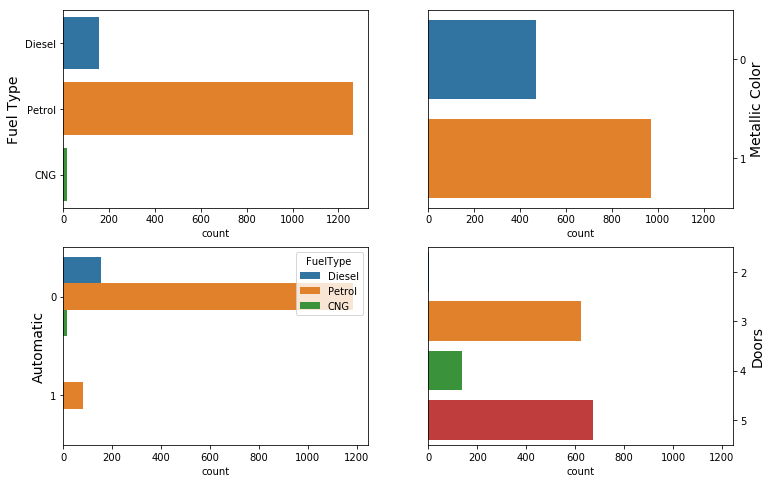

In [6]:
fig, ax = plt.subplots(2,2, figsize = (12,8), sharex = 'row')
#plt.subplots(2, 2, sharey='row')
sns.countplot(y = 'FuelType', data = df, ax = ax[0,0])
sns.countplot(y = 'MetColor', data = df, ax = ax[0,1])
sns.countplot(y = 'Automatic', data = df, hue = 'FuelType', ax = ax[1,0])
sns.countplot(y = 'Doors', data = df, ax = ax[1,1])

ax[0,0].set_ylabel('Fuel Type', fontsize=14)
ax[0,1].set_ylabel('Metallic Color', fontsize=14)
ax[1,0].set_ylabel('Automatic', fontsize=14)
ax[1,1].set_ylabel('Doors', fontsize=14)

ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()


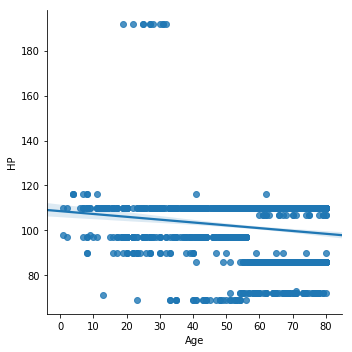

In [7]:
sns.lmplot(x = 'Age', y= 'HP', data = df)

I thought as age increased the HP would decrease as older cars would have lower HP. Should I check age with KMs to get more insight

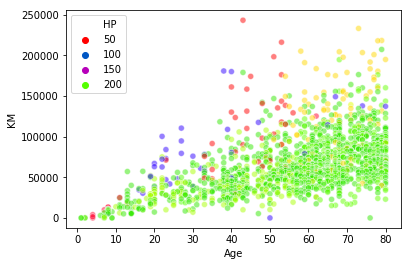

In [8]:
sns.scatterplot(x = df.Age, y= df.KM, hue = df.HP, palette = 'prism', alpha = 0.5)

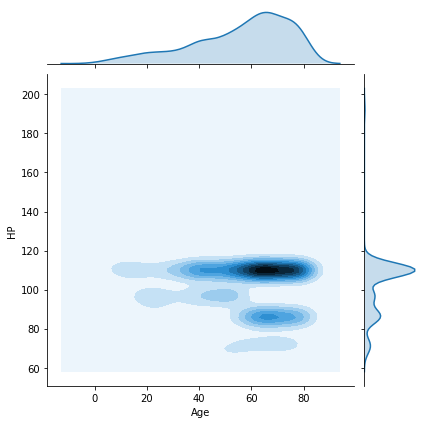

In [9]:
sns.jointplot('Age','HP', data = df, kind = 'kde')

We simply have more data for older cars and 100 HP followed by 80 HP. So we wont consider Age and HP to be related.

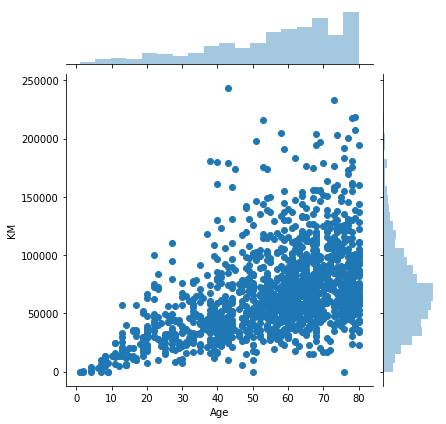

In [10]:
sns.jointplot('Age','KM', data = df)

Age and KM have a seem to have very loose correlation.

Text(0.5, 0, 'Doors')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Doors')

Text(0, 0.5, 'Price')

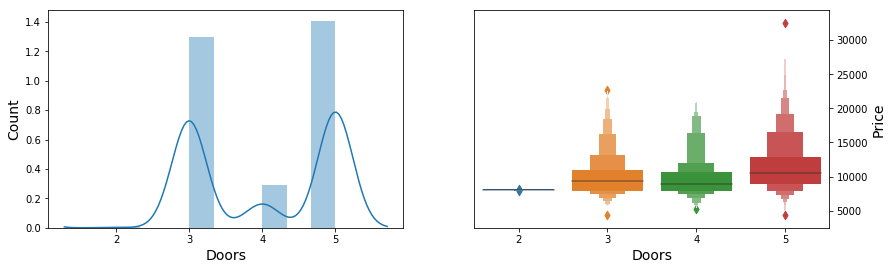

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Doors'], ax = axes[0])
axes[0].set_xlabel('Doors', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'Doors', y = 'Price', data = df, ax = axes[1])
axes[1].set_xlabel('Doors', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

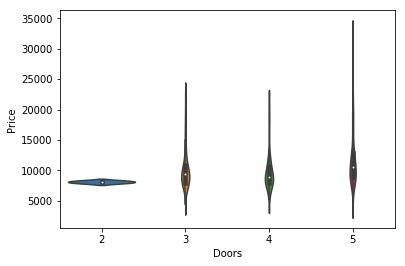

In [12]:
sns.violinplot(x = 'Doors', y = 'Price', data = df)

# Models

In [13]:
df.corr().iloc[0].sort_values()

Age      -0.876590
KM       -0.569960
CC        0.165067
HP        0.314990
Weight    0.581198
Price     1.000000
Name: Price, dtype: float64

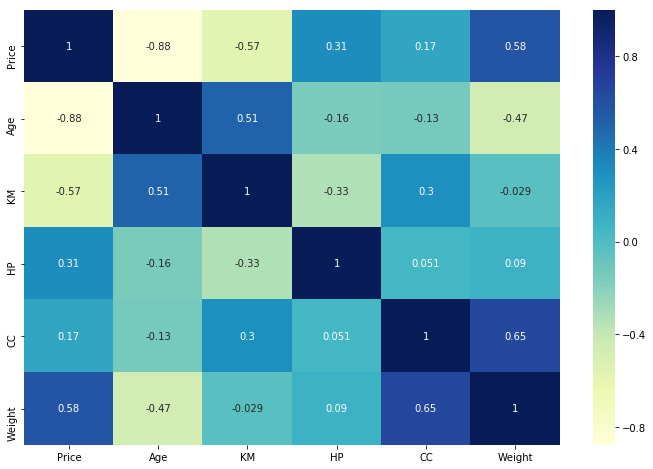

In [14]:
f, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data = df.corr(), annot = True, cmap="YlGnBu")

*Did Toyota stop producing CNG models??* Google this

In [15]:
df.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

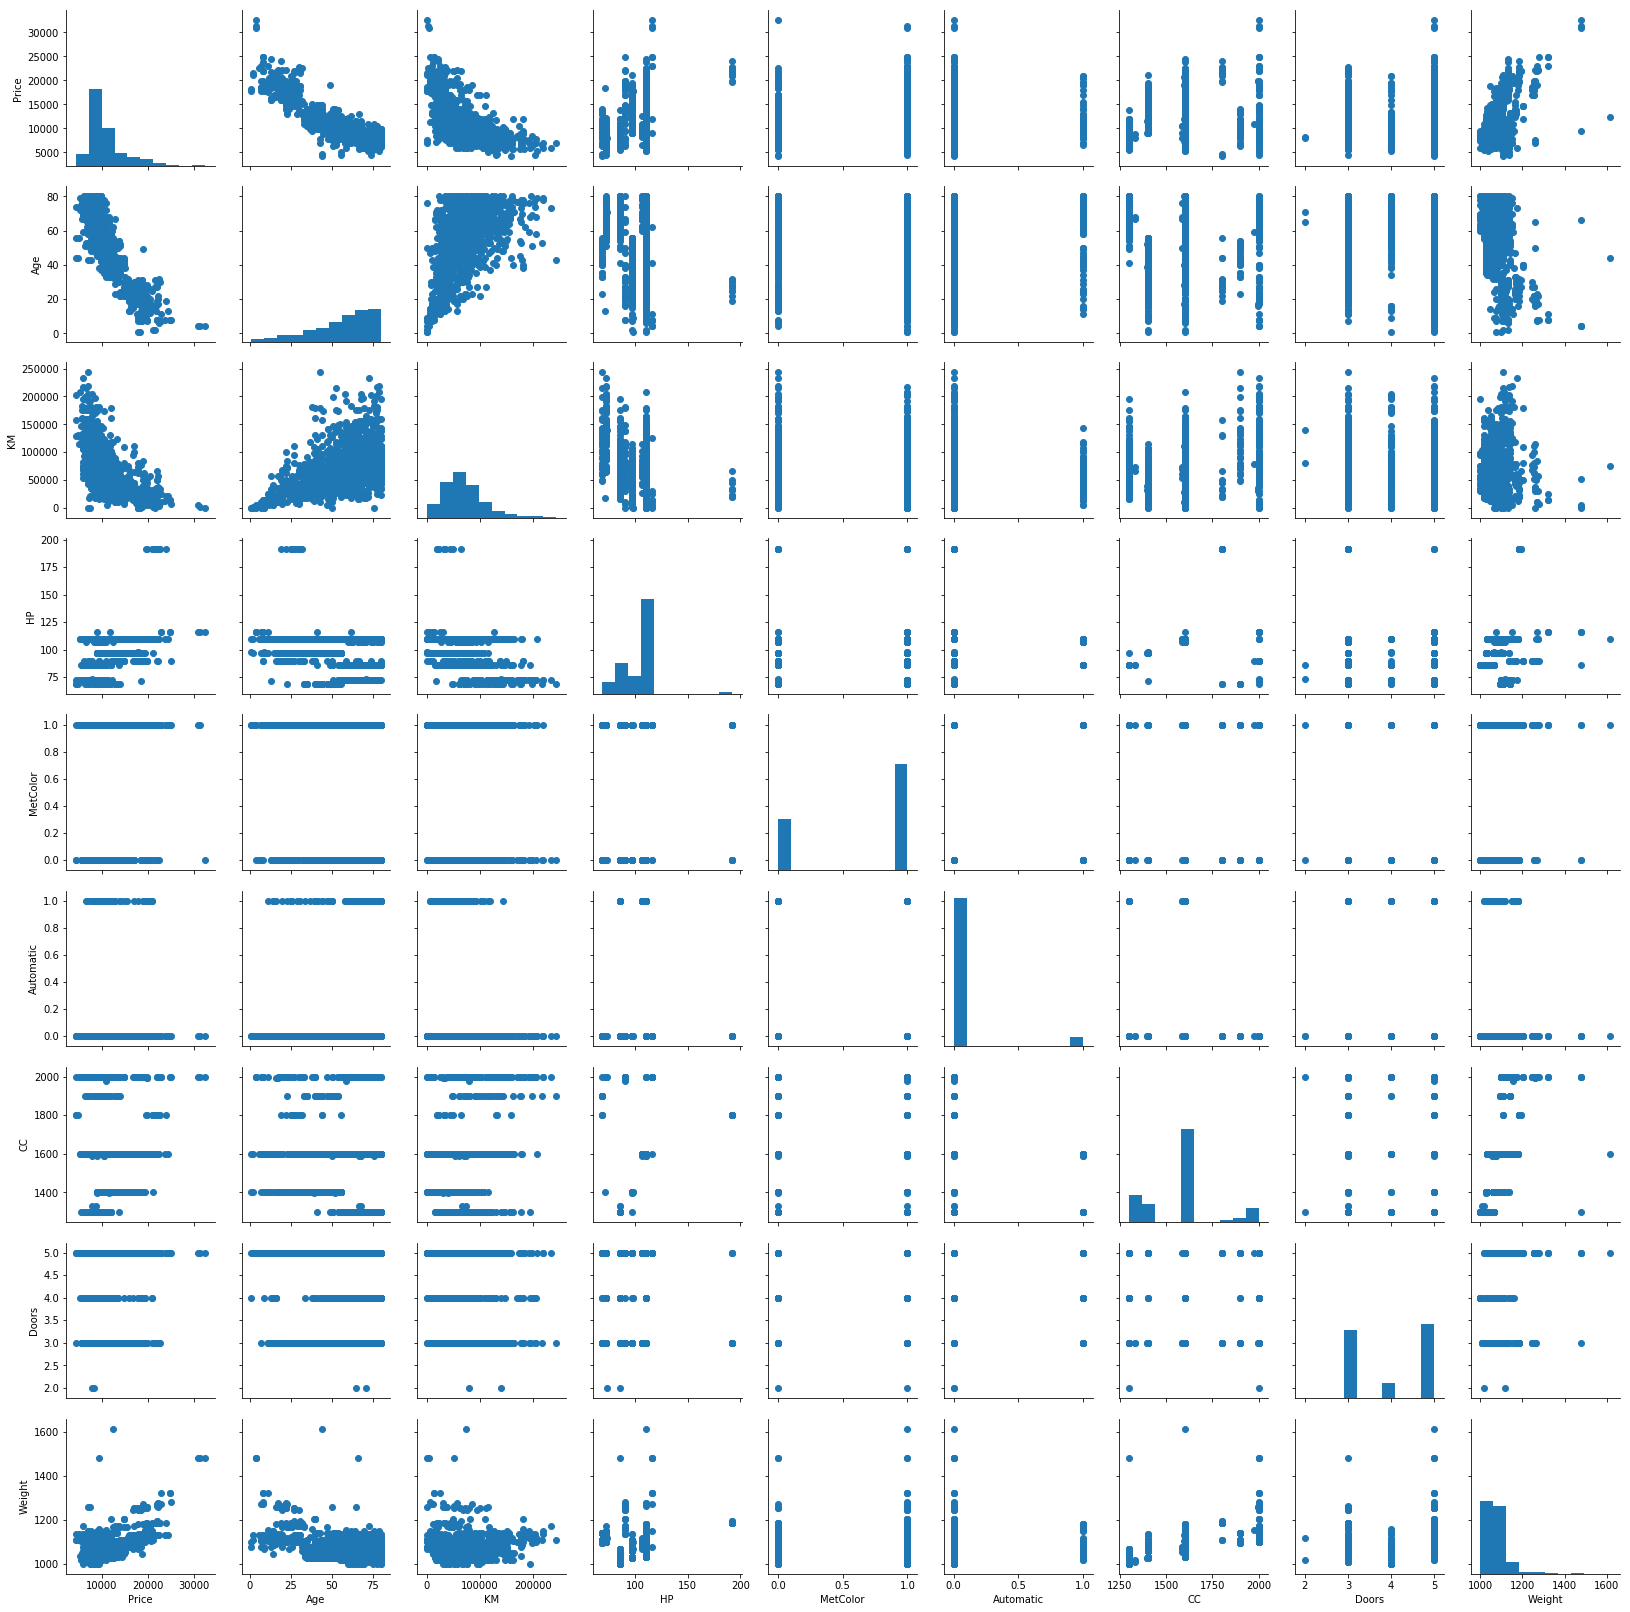

In [16]:
g = sns.PairGrid(data =df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null category
Automatic    1436 non-null category
CC           1436 non-null int64
Doors        1436 non-null category
Weight       1436 non-null int64
dtypes: category(3), int64(6), object(1)
memory usage: 83.2+ KB


In [18]:
df = pd.get_dummies(df, drop_first = True)
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Weight', 'FuelType_Diesel',
       'FuelType_Petrol', 'MetColor_1', 'Automatic_1', 'Doors_3', 'Doors_4',
       'Doors_5'],
      dtype='object')

In [19]:
model = smf.ols('Price ~ Age + KM + HP + MetColor_1 + Automatic_1 + CC + Doors_3 + Doors_4 + Doors_5 + Weight + \
                FuelType_Diesel + FuelType_Petrol', data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     792.4
Date:                Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:13:46   Log-Likelihood:                -12343.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1423   BIC:                         2.478e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3981.8875   1647.185     -2.417      0.016   -7213.059    -750.716
Age              -121.7902      2.601    -46.826      0.000    -126.892    -116.688
KM                 -0.0162      0.001    -12.330      0.000      -0.019      -0.014
HP                 60.0855      5.760     10.432      0.000      48.787      71.384
MetColor_1         51.5134     74.888      0.688      0.492     -95.390     198.416
Automatic_1       287.0754    158.061      1.816      0.070     -22.981     597.132
CC                 -4.2391      0.545     -7.774      0.000      -5.309      -3.169
Doors_3          -489.6087    932.426     -0.525      0.600   -2318.685    1339.468
Doors_4          -219.7580    938.028     -0.234      0.815   -2059.824    1620.308
Doors_5          -516.0675    933.376     -0.553      0.580   -2347.009    1314.874
Weight             20.7164      1.241     16.691      0.000      18.282      23.151
FuelType_Diesel  3368.3187    518.233      6.500      0.000    2351.737    4384.900
FuelType_Petrol  1160.3971    332.416      3.491      0.000     508.319    1812.475
==============================================================================
Omnibus:                      305.201   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3368.288
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                      10.387   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In report above, should the categorical features be coded as categorial before this report be generated? (Look at Fuel type)

Should negative corr featrures be used in model building?



In [20]:
(df[['Weight','HP','CC']]).corr()

,Weight,HP,CC
Weight,1.000000,0.089614,0.651450
HP,0.089614,1.000000,0.050884
CC,0.651450,0.050884,1.000000


Size of engine is CC. As size of engine increase, weight wull increase too.

## Splitting data

Get dummies was used already.....

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FT = le.fit_transform(df.FuelType)
df.FuelType = FT

df.describe()

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df.drop('Price' ,axis = 1), df.Price)

In [22]:
comparison = pd.DataFrame(columns = ['Model', 'Train R2', 'Test R2'])

In [23]:
comparison

,Model,Train R2,Test R2


## Simple Linear Regression

In [24]:
train_X.columns

Index(['Age', 'KM', 'HP', 'CC', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol',
       'MetColor_1', 'Automatic_1', 'Doors_3', 'Doors_4', 'Doors_5'],
      dtype='object')

In [25]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(train_X, train_y)
comparison.loc[0] = ['Simple Linear Regression', lr_model.score(train_X, train_y), lr_model.score(test_X, test_y) ]
print(comparison)

                      Model  Train R2   Test R2
0  Simple Linear Regression  0.863431  0.882765


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

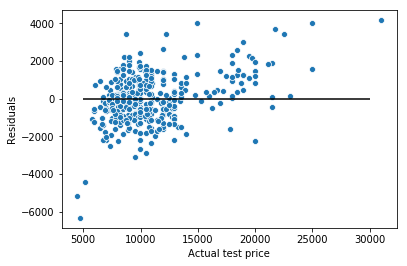

In [26]:
pred_y = lr_model.predict(test_X)
lr_model_residuals = test_y - pred_y
linear_rmse = mean_squared_error(pred_y, test_y) ** 0.5

sns.scatterplot(x = test_y, y = lr_model_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

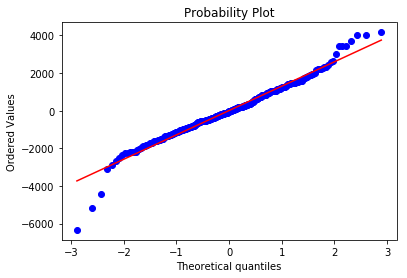

In [27]:
qqplot = stats.probplot(lr_model_residuals, dist = 'norm', plot = plt)

## Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X = poly.fit_transform(train_X)

poly_model = LinearRegression().fit(X, train_y)

comparison.loc[1] = ['Polynomial Regression degree 2', \
                      poly_model.score(X, train_y), poly_model.score(poly.fit_transform(test_X), test_y) ]
print(comparison)

                            Model  Train R2   Test R2
0        Simple Linear Regression  0.863431  0.882765
1  Polynomial Regression degree 2  0.905171  0.846775


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

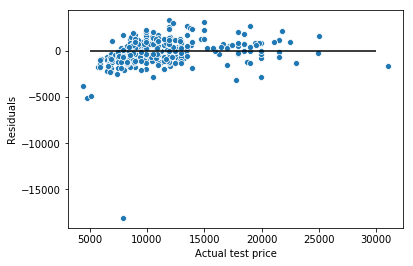

In [30]:
poly_predict = poly_model.predict(poly.fit_transform(test_X))
poly_residuals = test_y - poly_predict
poly_rmse = mean_squared_error(poly_predict, test_y) ** 0.5

sns.scatterplot(x = test_y, y = poly_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

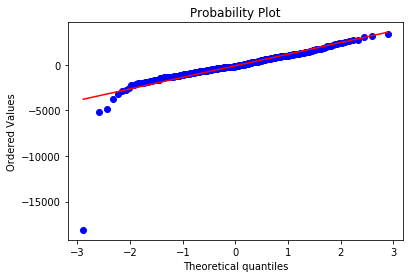

In [31]:
qqplot = stats.probplot(poly_residuals, dist = 'norm', plot = plt)

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(n_estimators=80, criterion='mse').fit(train_X, train_y)

comparison.loc[2] = ['Random Forest', RFR_model.score(train_X, train_y), RFR_model.score(test_X, test_y)]
print(comparison)

                            Model  Train R2   Test R2
0        Simple Linear Regression  0.863431  0.882765
1  Polynomial Regression degree 2  0.905171  0.846775
2                   Random Forest  0.986184  0.908150


Text(0.5, 0, 'Actual test price')

Text(0, 0.5, 'Residuals')

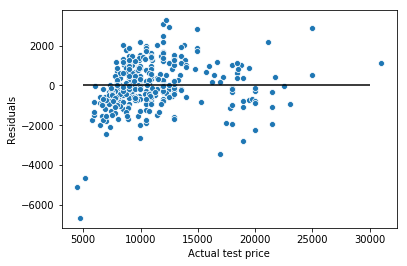

In [33]:
RFR_predict = RFR_model.predict(test_X)
RFR_residuals = test_y - RFR_predict
RFR_rmse = mean_squared_error(RFR_predict, test_y) ** 0.5
sns.scatterplot(x = test_y, y = RFR_residuals)
plt.xlabel('Actual test price')
plt.ylabel('Residuals')
plt.hlines(y = 0, xmin = 5000, xmax = 30000, color = 'black')

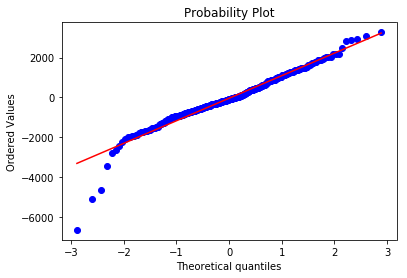

In [34]:
qqplot = stats.probplot(RFR_residuals, dist = 'norm', plot = plt)

In [35]:
t = [lr_model_residuals.var(), poly_residuals.var(),RFR_residuals.var()]

In [36]:
comparison['variance of residuals'] = t

In [37]:
comparison['rmse'] = [linear_rmse,poly_rmse,RFR_rmse]

Given the variance of residuals and the R2 values, Random Forest model would be selected

In [38]:
comparison

,Model,Train R2,Test R2,variance of residuals,rmse
0,Simple Linear Regression,0.863431,0.882765,1.709926e+06,1305.868419
1,Polynomial Regression degree 2,0.905171,0.846775,2.225731e+06,1492.912110
2,Random Forest,0.986184,0.908150,1.338196e+06,1155.869156


In [43]:
RFR_model.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [62]:
features = pd.DataFrame()
features['feature importance'] = RFR_model.feature_importances_

In [47]:
RFR_model.n_features_

12

In [63]:
features['features'] = train_X.columns

In [71]:
features['corr to price'] = list(df.corr().iloc[0][1:])

In [74]:
features.sort_values(by = 'feature importance', ascending = False)

,feature importance,features,corr to price
0,0.839121,Age,-0.876590
4,0.060623,Weight,0.581198
1,0.060290,KM,-0.569960
2,0.020809,HP,0.314990
3,0.004972,CC,0.165067
7,0.004457,MetColor_1,0.108905
9,0.002653,Doors_3,-0.150319
6,0.002039,FuelType_Petrol,-0.038516
11,0.001911,Doors_5,0.200352
5,0.001209,FuelType_Diesel,0.054084
